# MINST Digit Recognition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submissions = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


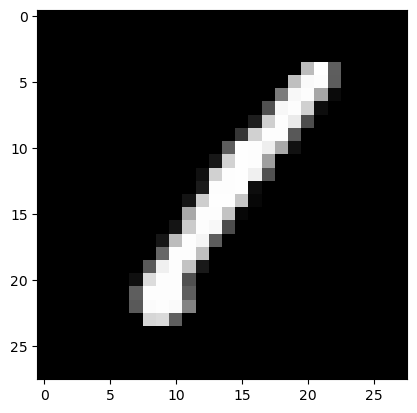

In [31]:
# Plot a random digit
random_digit = train.iloc[0,1:]
plt.imshow(np.array(random_digit).reshape(28, 28), cmap='gray')

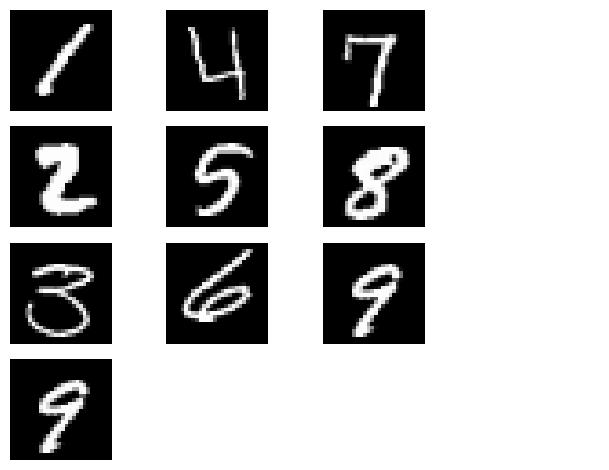

In [64]:
fig, ax = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):
        ax[i, j].axis('off')


for i in range(9):
    
    digit = np.array(train[train['label'] == i].iloc[0, 1:]).reshape(28, 28)
    # ax.imshow(np.array(random_digit).reshape(28, 28), cmap='gray')
    
    ax[i % 3, i // 3].imshow(digit, cmap='gray')
    ax[3, 0].imshow(digit, cmap='gray')
    

# fig.axis('off')
plt.tight_layout()
plt.show()

    

Jak wyglądają przykładowe predykcje?

In [9]:
sample_submissions.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [73]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Splitting labels from actual data
X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]

# Training first model

In [65]:
# SVM
from sklearn.svm import SVC

In [72]:
# svc_clf = SVC()
# svc_clf.fit(X_train, y_train)
# y_pred = svc_clf.predict(test)

SVC()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [2, 20, 100],
    'max_depth': [2, 4, 10, 20],
    'max_features': ['sqrt', 'auto'],
    'bootstrap': [True, False]
}

forest_clf = RandomForestClassifier(random_state=2002)
forest_grid = GridSearchCV(estimator=forest_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3, verbose=2)

In [16]:
forest_grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=2; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, n_estimators=2; total time=   0.2s
[CV] END 

[CV] END bootstrap=False, max_depth=2, max_features=auto, n_estimators=100; total time=   3.6s
[CV] END bootstrap=False, max_depth=2, max_features=auto, n_estimators=100; total time=   3.3s
[CV] END bootstrap=False, max_depth=2, max_features=auto, n_estimators=100; total time=   3.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=2; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=2; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=20; total time=   1.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=20; total time=   1.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=20; total time=   1.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n_estimators=100; total time=   7.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, n

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2002),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': [2, 20, 100]},
             scoring='accuracy', verbose=2)

In [17]:
forest_grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       random_state=2002)

In [18]:
forest_grid.best_score_

0.9653571428571429

In [19]:
type(forest_grid.best_estimator_)

sklearn.ensemble._forest.RandomForestClassifier

In [40]:
best_model = forest_grid.best_estimator_

digit = np.array(test.iloc[1, :]).reshape(1, -1)
digit.shape

(1, 784)

In [41]:
predition = best_model.predict(digit)

C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
predition

array([0], dtype=int64)

C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\janek\anaconda3\lib\site-packages\sklearn\base.py:4

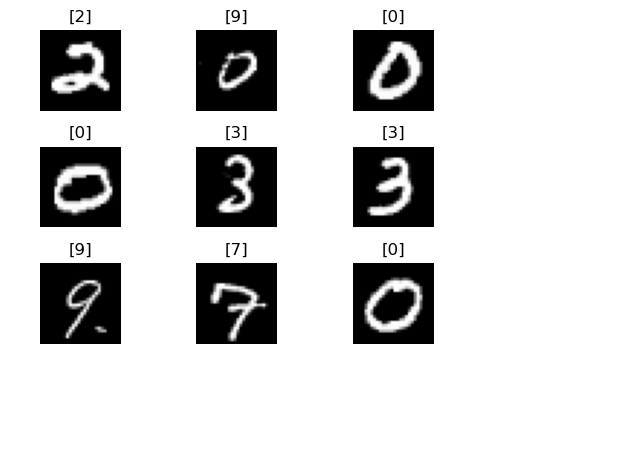

In [56]:
fig, ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i, j].axis('off')

for i in range(9):
    sample = np.array(train[train['label'] == i].iloc[0, 1:]).reshape(28, 28)
    sample = np.array(test.iloc[i, :]).reshape(28, 28)
    predicted_label = best_model.predict(sample.reshape(1, - 1))
    # digit = np.array(digit).reshape(28, 28)
    # ax.imshow(np.array(random_digit).reshape(28, 28), cmap='gray')
    ax[i % 3, i // 3].imshow(sample, cmap='gray')
    ax[i % 3, i // 3].set_title(f'{predicted_label}')

    
plt.tight_layout()


In [57]:
y_pred = best_model.predict(test)

In [58]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [68]:
ans = pd.DataFrame(y_pred, columns=['Label']).reset_index().rename({'index': 'ImageId'}, axis=1)
ans['ImageId'] = ans['ImageId'] + 1

In [71]:
ans.to_csv('./submissions/jan_submissions.csv', index=False)

In [72]:
sample_submissions

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
